**Case Study:Analyzing the correlation between air quality data and public health outcomes in New York City**

In this notebook, I aim to explore the correlation between air quality and public health
outcomes in New York City. Through the analysis of atmospheric conditions data and its
correlation with health data. My primary objective is to ascertain
whether a significant relationship exists between atmospheric pollutants and the
prevalence of health issues, particularly respiratory ailments, within the city's population.
To this end, I have specifically selected air quality data that targets pollutants known to
have adverse health effects, such as PM2.5 and NO2.
Furthermore, I have honed in on three specific neighborhoods to assess air quality that can provide an overview of the whole area requires considering diversity in geography, urban density, and potential sources of pollution. I  chose New yourk, Manhatan,Staten Island to provide a more granular examination and potentially uncover any localized trends or disparities.

**Exploratory Data Analysis(EDA)**

**1. Sourcing and loading**

**1.1.Import relevant libraries**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1.2.Lod the Data**

In [44]:
#Load data for "aa_no_pm" include asthma adults, NO2, PM2.5
df1=pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aa_no_pm_cleaned.csv')

#Load data for "aag4_no_pm" include asthma age 4 and under, NO2, PM2.5

df2=pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aag4_no_pm_cleaned.csv')

#Load data for "aa5_17_no_pm" include asthma age 5 to 17 , NO2, PM2.5

df3=pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aa5_17_no_pm_cleaned.csv')

**1.3.Exploring the Data**

In [46]:
df1

,Year,GeoType,GeoID,Number,no2/Mean ppb,Geography,pm/Mean mcg/m3
0,2020,CD,101,80.0,21.7,Financial District (CD1),7.5
1,2020,CD,102,81.0,21.3,Greenwich Village and Soho (CD2),8.5
2,2020,CD,103,661.0,19.4,Lower East Side and Chinatown (CD3),7.5
3,2020,CD,104,364.0,22.5,Clinton and Chelsea (CD4),8.0
4,2020,CD,105,116.0,26.3,Midtown (CD5),9.2
...,...,...,...,...,...,...,...
342,2009,Borough,2,20450.0,24.1,Brooklyn,10.5
343,2009,Borough,3,14493.0,33.9,Manhattan,12.6
344,2009,Borough,4,10602.0,22.2,Queens,10.0
345,2009,Borough,5,2843.0,16.8,Staten Island,9.8


In [47]:
df2

,Year,GeoType,GeoID,Number,no2/Mean ppb,Geography,pm/Mean mcg/m3
0,2020,CD,101,7,21.7,Financial District (CD1),7.5
1,2020,CD,102,1,21.3,Greenwich Village and Soho (CD2),8.5
2,2020,CD,103,47,19.4,Lower East Side and Chinatown (CD3),7.5
3,2020,CD,104,11,22.5,Clinton and Chelsea (CD4),8.0
4,2020,CD,105,7,26.3,Midtown (CD5),9.2
...,...,...,...,...,...,...,...
390,2009,Borough,2,5848,24.1,Brooklyn,10.5
391,2009,Borough,3,2993,33.9,Manhattan,12.6
392,2009,Borough,4,4336,22.2,Queens,10.0
393,2009,Borough,5,544,16.8,Staten Island,9.8


In [48]:
df3

,Year,GeoType,GeoID,Number,no2/Mean ppb,Geography,pm/Mean mcg/m3
0,2020,CD,101,6,21.7,Financial District (CD1),7.5
1,2020,CD,102,5,21.3,Greenwich Village and Soho (CD2),8.5
2,2020,CD,103,136,19.4,Lower East Side and Chinatown (CD3),7.5
3,2020,CD,104,34,22.5,Clinton and Chelsea (CD4),8.0
4,2020,CD,105,5,26.3,Midtown (CD5),9.2
...,...,...,...,...,...,...,...
390,2009,Borough,2,7190,24.1,Brooklyn,10.5
391,2009,Borough,3,4776,33.9,Manhattan,12.6
392,2009,Borough,4,5046,22.2,Queens,10.0
393,2009,Borough,5,822,16.8,Staten Island,9.8


In [49]:
#Summary Statistics Table
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,347.0,2017.971182,2.608186,2009.0,2018.00,2019.0,2020.00,2020.0
GeoID,347.0,235.426513,153.921034,1.0,105.00,211.0,401.00,504.0
Number,347.0,4782.498559,12261.573480,11.0,398.00,918.0,2458.50,77792.0
no2/Mean ppb,347.0,18.123919,3.887445,9.9,15.65,17.8,20.05,33.9
pm/Mean mcg/m3,347.0,7.262536,1.357417,5.3,6.20,6.9,8.00,12.6


In [50]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,395.0,2017.610127,2.630338,2009.0,2016.00,2019.0,2020.00,2020.0
GeoID,395.0,237.526582,153.430042,1.0,105.00,211.0,401.00,504.0
Number,395.0,1127.222785,3097.637474,1.0,51.50,157.0,515.50,20330.0
no2/Mean ppb,395.0,18.380253,3.938495,9.9,15.75,18.1,20.65,33.9
pm/Mean mcg/m3,395.0,7.477468,1.441014,5.3,6.30,7.1,8.40,12.6


In [51]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,395.0,2017.610127,2.630338,2009.0,2016.00,2019.0,2020.00,2020.0
GeoID,395.0,237.526582,153.430042,1.0,105.00,211.0,401.00,504.0
Number,395.0,1720.703797,4522.807623,5.0,109.00,275.0,936.50,28370.0
no2/Mean ppb,395.0,18.380253,3.938495,9.9,15.75,18.1,20.65,33.9
pm/Mean mcg/m3,395.0,7.477468,1.441014,5.3,6.30,7.1,8.40,12.6


**1.4.Build data profile tables and plots**

I need to pick a dependent variable for my regression analysis: a variable whose values I will predict.

**1.4.1.DF1(aa_no_pm)**

In [55]:
# make a subset of df and drop unnecessary columns

# List of columns you want to exclude
columns_to_exclude= ['Year','GeoID','Geography','GeoType']

# Select columns that are not in the exclusion list
df1_subset= df1_subset = df1.loc[:, ~df1.columns.isin(columns_to_exclude)]


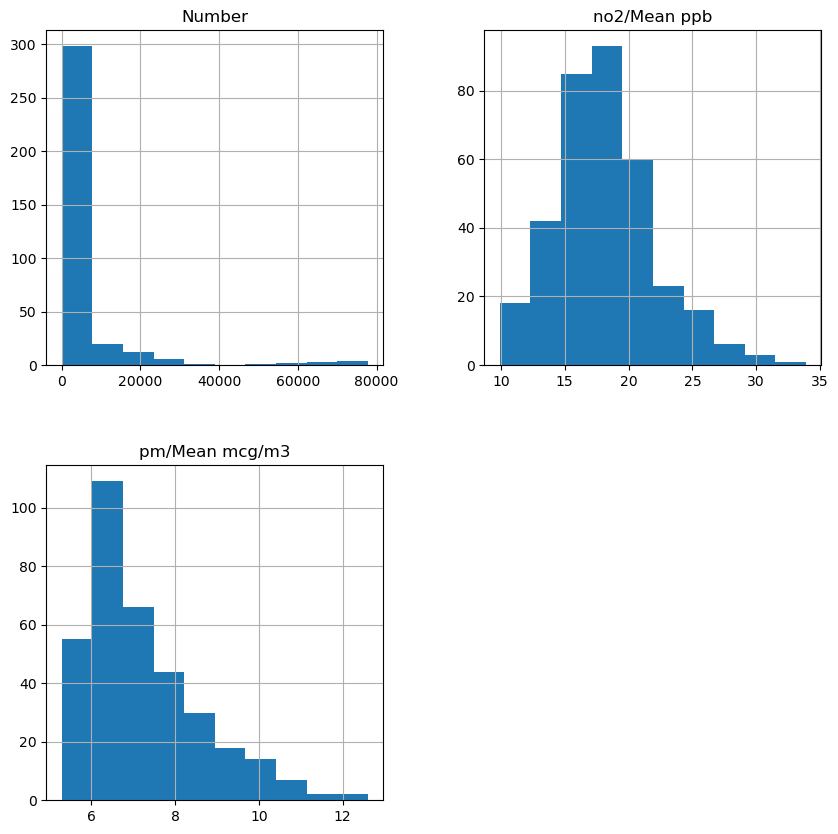

In [56]:
# Making a histogram for each variable in df

axes= df1_subset.hist(bins=10,figsize=(10,10))

Based on the above plots the distribution of number of adult(Number) is highly skewed to the right,indicating that there are many low values and fewer high values.The presence of high-frequency values at specific points may indicate certain thresholds or events that cause spikes.

For"no2/Mean ppb", the distribution appears to be more symmetric but PM2.5 the distribution is skewed to the right but less so than the Number variable.

**1.4.2.DF2(aag4_no_pm)**

In [60]:
# make a subset of df and drop unnecessary columns

# List of columns you want to exclude
columns_to_exclude= ['Year','GeoID','Geography','GeoType']

# Select columns that are not in the exclusion list
df2_subset= df2_subset = df2.loc[:, ~df2.columns.isin(columns_to_exclude)]


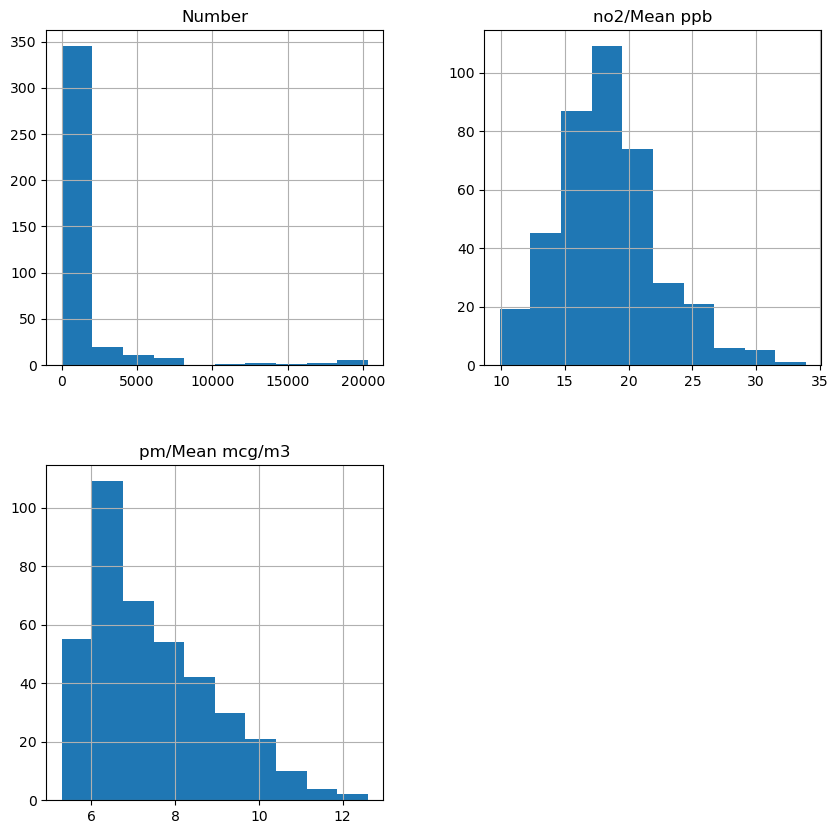

In [61]:
# Making a histogram for each variable in df

axes= df2_subset.hist(bins=10,figsize=(10,10))

**1.4.3.DF3(aa5_17_no_pm)**

In [62]:
# make a subset of df and drop unnecessary columns

# List of columns you want to exclude
columns_to_exclude= ['Year','GeoID','Geography','GeoType']

# Select columns that are not in the exclusion list
df3_subset= df3_subset = df3.loc[:, ~df3.columns.isin(columns_to_exclude)]


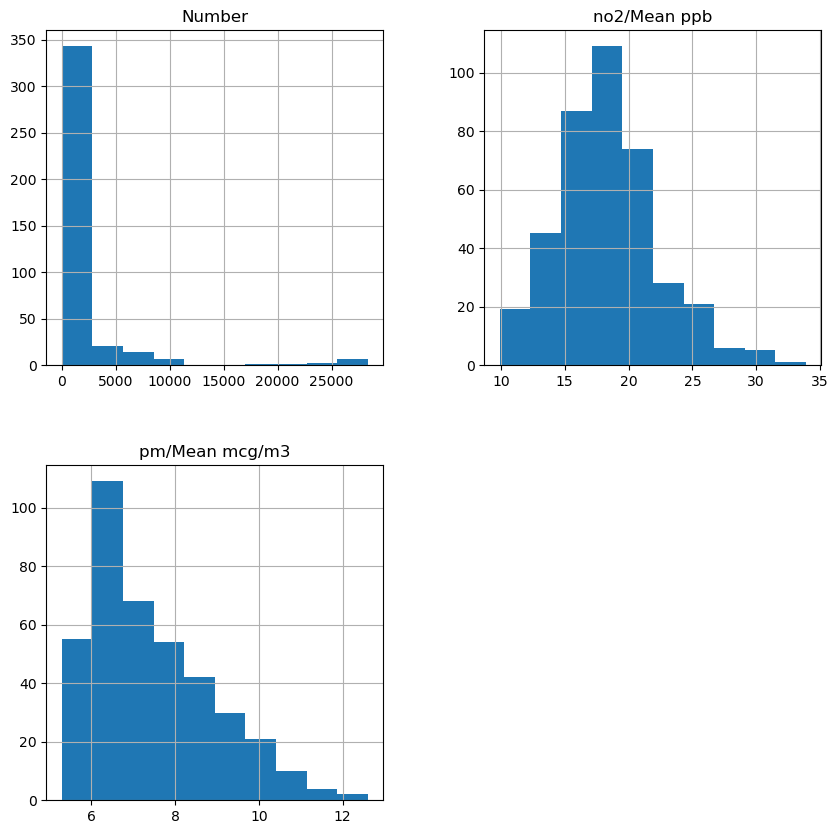

In [64]:
# Making a histogram for each variable in df

axes= df3_subset.hist(bins=10,figsize=(10,10))

**1.5.Explore data relationships** 

In this section we can call the .corr() method on our data to look at all the correlations between our variables.

In [72]:
# Call the .corr() method on the dataset 

df1[['Number','no2/Mean ppb','pm/Mean mcg/m3']].corr()

,Number,no2/Mean ppb,pm/Mean mcg/m3
Number,1.000000,0.162384,0.342829
no2/Mean ppb,0.162384,1.000000,0.846582
pm/Mean mcg/m3,0.342829,0.846582,1.000000


 Plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


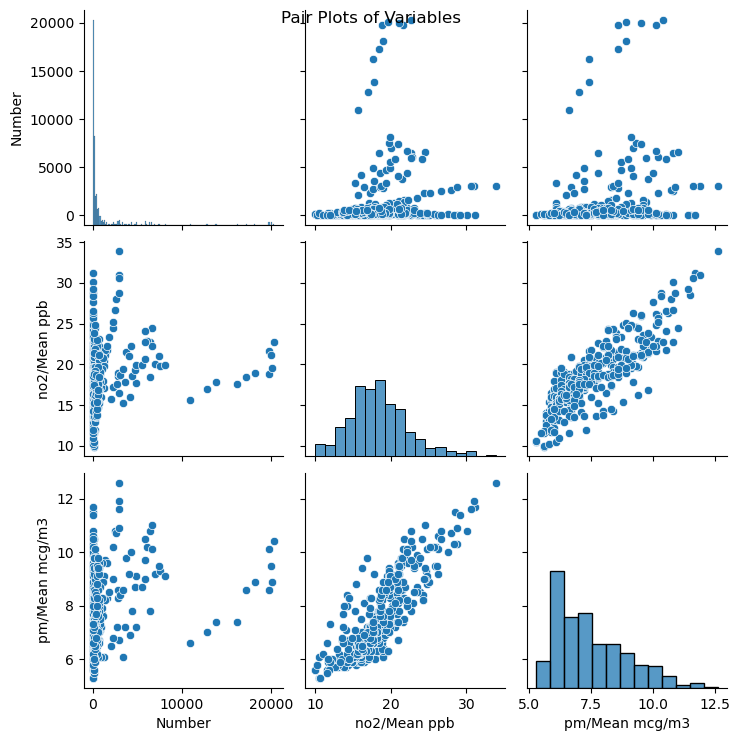

In [66]:
sns.pairplot(df1_subset)
plt.suptitle('Pair Plots of Variables')
plt.show()

In [73]:
# Call the .corr() method on the dataset 
df2[['Number','no2/Mean ppb','pm/Mean mcg/m3']].corr()

,Number,no2/Mean ppb,pm/Mean mcg/m3
Number,1.000000,0.143887,0.306517
no2/Mean ppb,0.143887,1.000000,0.838674
pm/Mean mcg/m3,0.306517,0.838674,1.000000


/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


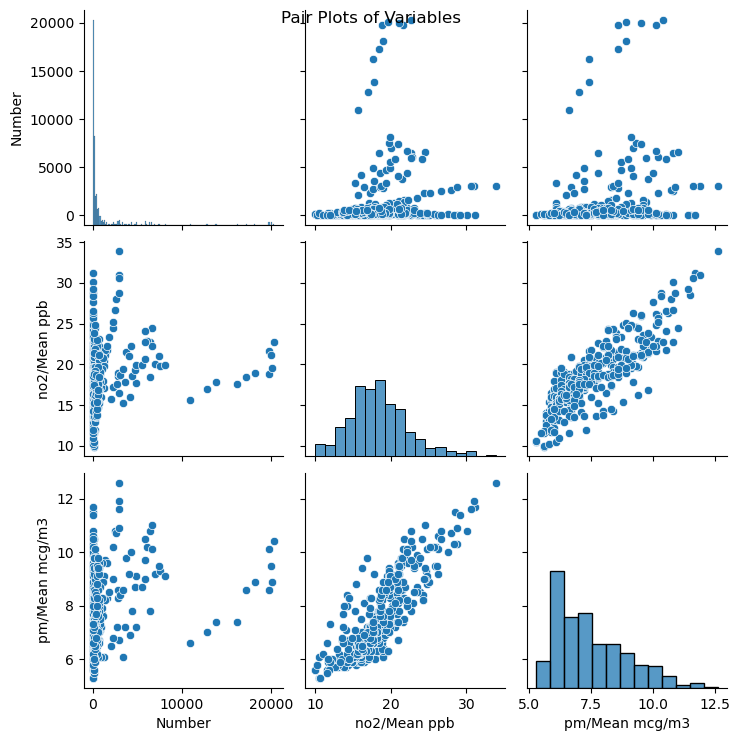

In [70]:
sns.pairplot(df2_subset)
plt.suptitle("Pair Plots of Variables")
plt.show()

In [74]:
# Call the .corr() method on the dataset 
df3[['Number','no2/Mean ppb','pm/Mean mcg/m3']].corr()

,Number,no2/Mean ppb,pm/Mean mcg/m3
Number,1.000000,0.131468,0.284141
no2/Mean ppb,0.131468,1.000000,0.838674
pm/Mean mcg/m3,0.284141,0.838674,1.000000


**1.5.1.Visualize Relationships Between Variables**

Let's use a Correlation Matrix to look at the relationships between variables in our dadasets.

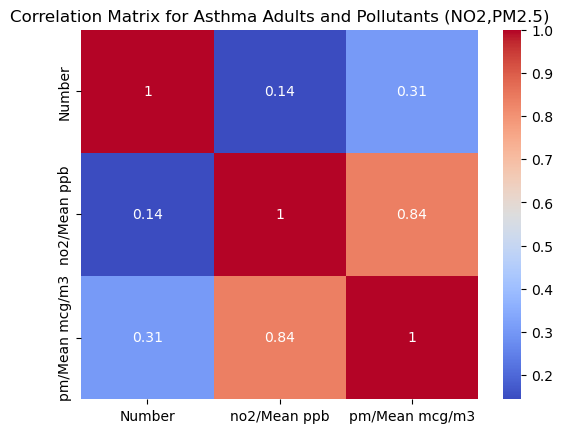

In [76]:
#correlation matrix 1
#Create a correlation heatmap for looking at the correlation of all variables/features for all dfatasets for asthma adults

sns.heatmap(df1_subset.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Asthma Adults and Pollutants (NO2,PM2.5)')
plt.show()

The correlation matrix, which contains a subset of only numeric variables, indicates the following notable relationships between variables:

**Strong Correlation**

no2/Mean ppb : pm/Mean mcg/m3 (.84)

**Weak to Moderately Correlation**

Number of adult asthma : no2/Mean ppb (.16)

Number of adult asthma : pm/Mean mcg/m3 (.34)


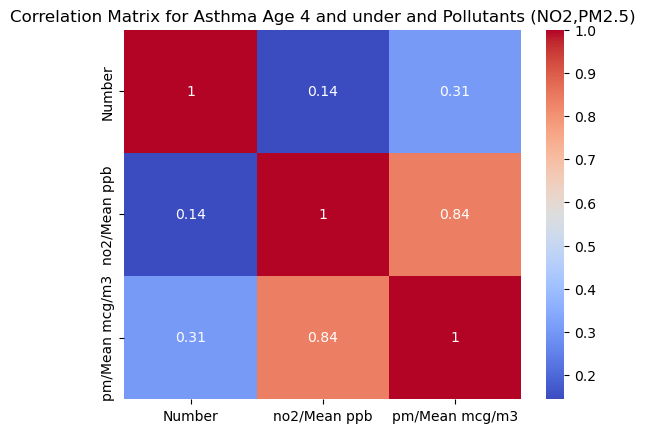

In [80]:
#correlation matrix 2
#Create a correlation heatmap for looking at the correlation of all variables/features for all dfatasets for asthma age4 and under

sns.heatmap(df2_subset.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Asthma Age 4 and under and Pollutants (NO2,PM2.5)')
plt.show()

**Strong Correlation**

no2/Mean ppb : pm/Mean mcg/m3 (.84)

**Weak to Moderately Correlation**

Number of adult asthma : no2/Mean ppb (.14)

Number of adult asthma : pm/Mean mcg/m3 (.31)

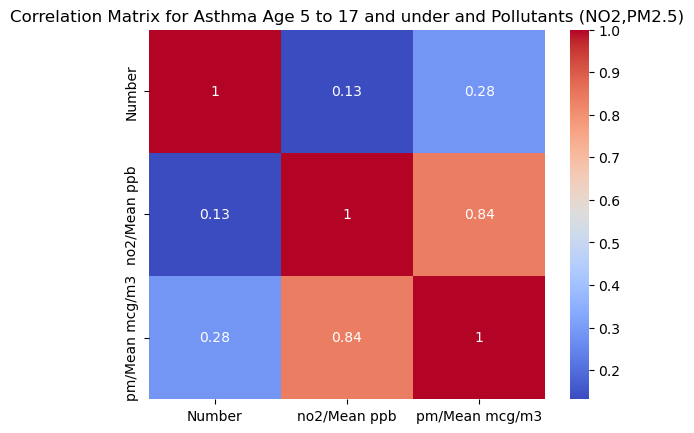

In [81]:
#correlation matrix 3
#Create a correlation heatmap for looking at the correlation of all variables/features for all dfatasets for asthma age 5 to 17 

sns.heatmap(df3_subset.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Asthma Age 5 to 17 and under and Pollutants (NO2,PM2.5)')
plt.show()

**Strong Correlation**

no2/Mean ppb : pm/Mean mcg/m3 (.84)

**Weak to Moderately Correlation**

Number of adult asthma : no2/Mean ppb (.13)

Number of adult asthma : pm/Mean mcg/m3 (.28)

**Correlations**

Based on the above correlation matrix, all three plots have a same correlation between features. The findings from the EDA analysis of the variables and correlations revealed that the strong positive correlation between the NO2 and PM2.5 pollutant levels.When NO2 levels increase, PM2.5 levels tend to increase as well.

The number of asthma for all three categories(adults,0-4,5-17) indicates a weak positive correlation between them and NO2 levels.A slight increase in adult asthma cases can be observed with increasing NO2 levels, but the correlation is not strong.


The number of asthma for all three categories(adults,0-4,5-17) indicates a moderate positive correlation between them and PM2.5 levels.There is a more noticeable increase in asthma cases with increasing PM2.5 levels compared to NO2 levels.